In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

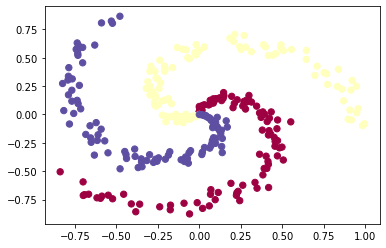

In [61]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [62]:
X.shape,y.shape

((300, 2), (300,))

## SVM
1. loss function: CE
2. w:(2,3)
3. b:(3,)
4. param init
5. prevent overfit: L2

In [63]:
W=np.random.randn(2,3)*0.01
b=np.zeros((3))

In [64]:
W,b

(array([[ 0.00390961,  0.0040198 ,  0.01332439],
        [ 0.00387787, -0.01252866, -0.0053384 ]]),
 array([0., 0., 0.]))

In [65]:
##hyperparam
lambda_=1e-3
learning_rate=1e-3

In [66]:
## feed forward
out=X@W+b
## CE
exp_y=np.exp(out)
prob=exp_y/np.sum(exp_y,axis=1,keepdims=1)
loss=np.sum(prob[np.arange(len(y)),y])/len(y)+0.5*lambda_*np.sum(W**2)

In [67]:
loss

0.3325317818603684

In [68]:
## backpropagation

dout=prob.copy()
dout[np.arange(len(y)),y]-=1

dW=X.T@dout+lambda_*W
db=np.sum(dout,axis=0)


In [69]:
dW.shape,db.shape

((2, 3), (3,))

In [70]:
## update parameter
W-=learning_rate*dW
b-=learning_rate*db

In [71]:
## training
epoch=100

for i in range(epoch):
    ## feed forward
    out=X@W+b
    ## CE
    exp_y=np.exp(out)
    prob=exp_y/np.sum(exp_y,axis=1,keepdims=1)
    loss=-np.log(np.sum(prob[np.arange(len(y)),y])/len(y))+0.5*lambda_*np.sum(W**2)
    
    
    ##cal acc
    pred=np.argmax(prob,axis=1)
    acc=np.sum(pred==y)/len(y)

    
    print(f"epoch {i+1} ; loss  {loss}  ; acc  {acc}")

    ## backpropagation

    dout=prob.copy()
    dout[np.arange(len(y)),y]-=1

    dW=X.T@dout+lambda_*W
    db=np.sum(dout,axis=0)

    ## update parameter
    W-=learning_rate*dW
    b-=learning_rate*db

    

epoch 1 ; loss  1.0915881376512422  ; acc  0.5166666666666667
epoch 2 ; loss  1.082375633069524  ; acc  0.5233333333333333
epoch 3 ; loss  1.0733785549772628  ; acc  0.52
epoch 4 ; loss  1.064592984181988  ; acc  0.52
epoch 5 ; loss  1.0560148789188957  ; acc  0.52
epoch 6 ; loss  1.04764009896725  ; acc  0.52
epoch 7 ; loss  1.0394644276477547  ; acc  0.52
epoch 8 ; loss  1.0314835918622114  ; acc  0.52
epoch 9 ; loss  1.0236932803123846  ; acc  0.5166666666666667
epoch 10 ; loss  1.0160891600178787  ; acc  0.5166666666666667
epoch 11 ; loss  1.008666891240893  ; acc  0.52
epoch 12 ; loss  1.0014221409174935  ; acc  0.52
epoch 13 ; loss  0.994350594689276  ; acc  0.52
epoch 14 ; loss  0.9874479676251414  ; acc  0.5266666666666666
epoch 15 ; loss  0.9807100137197228  ; acc  0.5233333333333333
epoch 16 ; loss  0.9741325342523075  ; acc  0.5266666666666666
epoch 17 ; loss  0.9677113850875977  ; acc  0.5266666666666666
epoch 18 ; loss  0.961442482997153  ; acc  0.5233333333333333
epoch 19

(-1.876814743884053, 1.8631852561159503)

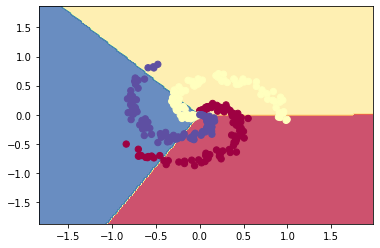

In [72]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())